<a href="https://colab.research.google.com/github/eashabibi/FML/blob/main/Univariate_Regression_On_Startups.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
startups=pd.read_csv('/content/drive/MyDrive/FML/50_Startups.csv')

In [3]:
startups.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
startups.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

<Axes: >

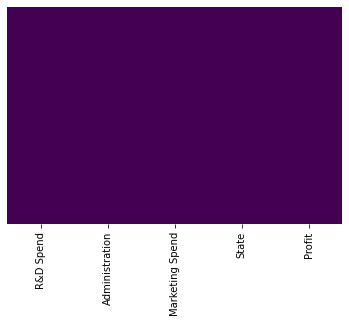

In [9]:
sns.heatmap(startups.isnull(),cbar=False,yticklabels=False,cmap="viridis")

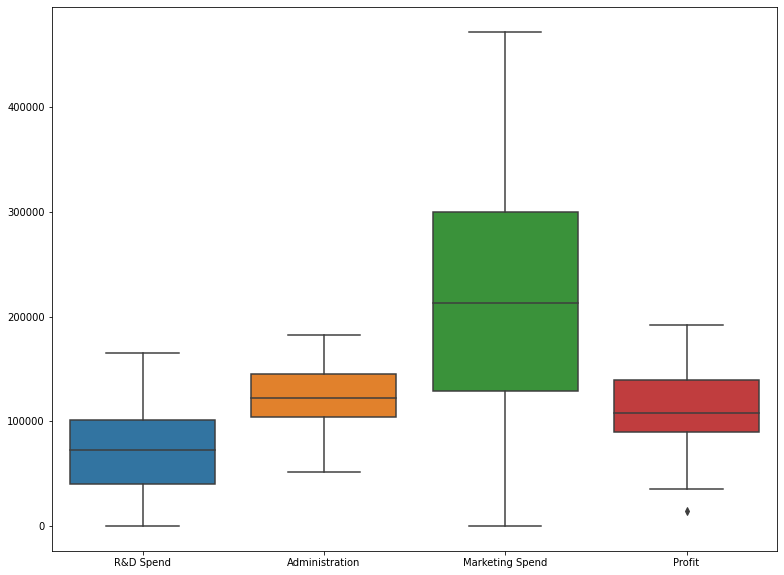

In [17]:
# boxplot
# To increase figure size
plt.figure(figsize=(13,10))
sns.boxplot(startups) 
plt.show()

In [20]:
# finding quartiles q1 and q3 using "quantile" function 
# inter quartile range=q3-q1
q1=startups["Profit"].quantile(0.25)
q3=startups["Profit"].quantile(0.75)
inqr=q3-q1
print(inqr)

49627.07499999998


In [22]:
# After finding inter quartile range , finding upper limit and lower limit of profit coloumn
up_lim=q3+1.5*inqr
low_lim=q1-1.5*inqr
print(up_lim,low_lim)



214206.58999999997 15698.290000000023


In [26]:
# values Above the upper limit and below lower limit are OUTLIERS
outliers=[]
profit=startups["Profit"]
for i in profit:
  if(i>up_lim or i<low_lim):
      outliers.append(i)
print(outliers)
# at 14681.4  the outlier point is obtained, it is inserted into actual profit coloumn data
# Using measures of central of tendency either mean (or) median (or) mode


[14681.4]


In [27]:
# repalcing outliers with mean value 
# updating profit column
startups["Profit"]=startups["Profit"].replace(outliers,startups["Profit"].mean())

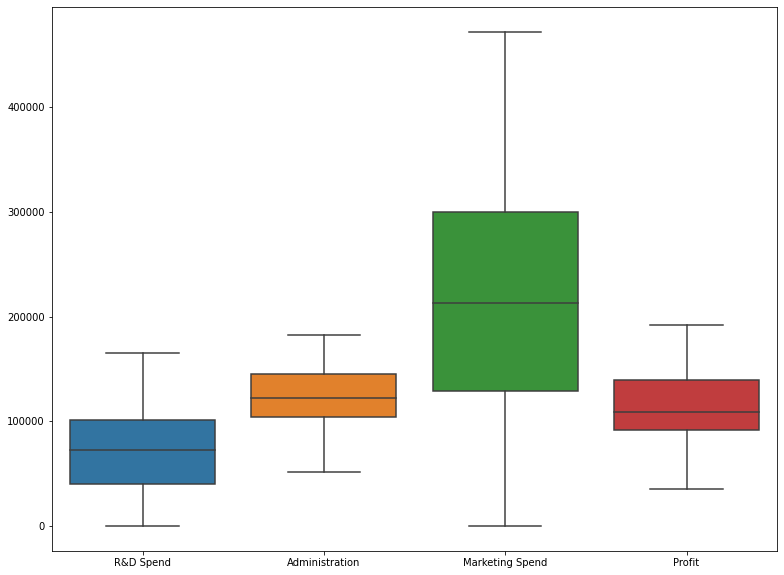

In [29]:
# displaying dataset by removing outliers
plt.figure(figsize=(13,10))
sns.boxplot(startups) 
plt.show()

In [32]:
# To find correlation between columns
startups.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.953493
Administration,0.241955,1.000000,-0.032154,0.205950
Marketing Spend,0.724248,-0.032154,1.000000,0.726445
Profit,0.953493,0.205950,0.726445,1.000000


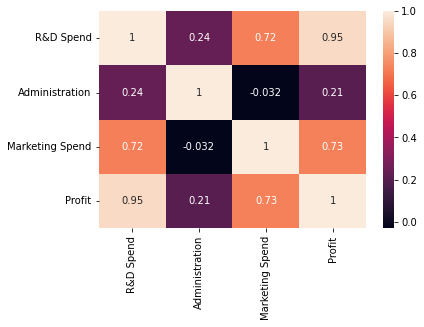

In [39]:
# TO visualize clearly in heatmap 
sns.heatmap(startups.corr(),annot=True)
plt.show()

In [46]:
# From above heatmap R&D spend and Profit are highly correlated(near to 1) SO using R&D spend we can get output "profit"
# To convert from dataframe to numpy array ".value" is used.
X=startups['R&D Spend'].values
y=startups['Profit'].values

numpy.ndarray

In [ ]:
X.shape,y.shape
# data is in array of 50 elements.

((50,), (50,))

In [47]:
# reshape changes data into 2D of rows and coloums.
X=X.reshape(-1,1)
X.shape

(50, 1)

In [ ]:
y=y.reshape(-1,1)
y.shape

(50, 1)

In [ ]:
X.shape,y.shape

((50, 1), (50, 1))

In [62]:
# splitting data for training and testing.
from sklearn.model_selection  import train_test_split 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.10,random_state=42)

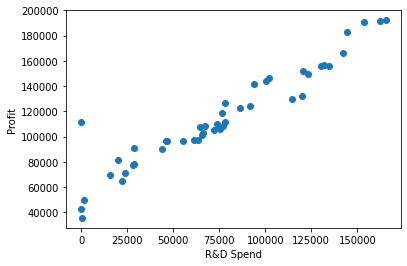

In [63]:
# plotting data
plt.scatter(X_train,y_train)
plt.xlabel("R&D Spend")
plt.ylabel("Profit")
plt.show()

In [64]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

In [65]:
# For training "fit" method is used
reg.fit(X_train,y_train)

LinearRegression()

In [66]:
# For predicting errors for training error 
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
y_predict=reg.predict(X_train)
mae=mean_absolute_error(y_train,y_predict) 
mse=mean_squared_error(y_train,y_predict)
rmse=np.sqrt(mean_squared_error(y_train,y_predict))
rs=r2_score(y_train,y_predict)
print("mae ",mae)
print("mse ",mse)
print("rmse ",rmse)
print("rs ",rs) 
# r2 score always lies between 0 to 1

mae  7735.815752085354
mse  137228711.56221932
rmse  11714.465910241888
rs  0.9058919929607832


In [67]:
# Testing data (which is unseen data by model)
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
y_predict_test=reg.predict(X_test)
mae=mean_absolute_error(y_test,y_predict_test)
mse=mean_squared_error(y_test,y_predict_test)
rmse=np.sqrt(mean_squared_error(y_test,y_predict_test))
rs=r2_score(y_test,y_predict_test)
print("mae ",mae)
print("mse ",mse)
print("rmse ",rmse)
print("rs ",rs)

mae  5872.153429054177
mse  36057700.030515544
rmse  6004.806410744275
rs  0.9470589980851247


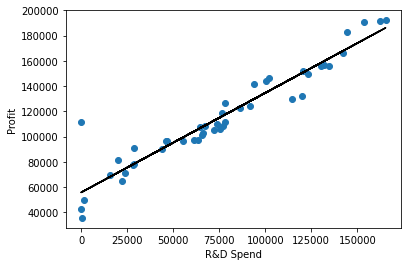

In [69]:
# Best fit line is obtained.
plt.scatter(X_train,y_train)
plt.xlabel("R&D Spend")
plt.ylabel("Profit")
plt.plot(X_train,y_predict,color='black')
plt.show()